# Big Data Analytics 2020-2021 - Lab 13 : Backpropagation

1. Derive backprop equations for a simple neural network
2. Implement backprop equations in code

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid
import math
%matplotlib inline

## Introducing the toy dataset

In this lab, we examine a classification problem for which the data is not linearly separable. We will implement a neural network and train it using gradient descent, computing gradients using the backpropagation algorithm.

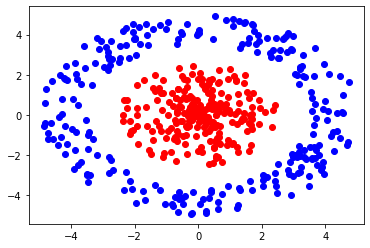

In [2]:
np.random.seed(0)

def make_dataset(num_points):
    radius = 5
    data = []
    labels = []
    # Generate positive examples (labeled 1).
    for i in range(num_points // 2):
        r = np.random.uniform(0, radius*0.5)
        angle = np.random.uniform(0, 2*math.pi)
        x = r * math.sin(angle)
        y = r * math.cos(angle)
        data.append([x, y])
        labels.append(1)
        
    # Generate negative examples (labeled 0).
    for i in range(num_points // 2):
        r = np.random.uniform(radius*0.7, radius)
        angle = np.random.uniform(0, 2*math.pi)
        x = r * math.sin(angle)
        y = r * math.cos(angle)
        data.append([x, y])
        labels.append(0)
        
    data = np.asarray(data)
    labels = np.asarray(labels)
    return data, labels
    
num_data = 500
data, labels = make_dataset(num_data)

# Note: red indicates a label of 1, blue indicates a label of 0
plt.scatter(data[:num_data//2, 0], data[:num_data//2, 1], color='red') 
plt.scatter(data[num_data//2:, 0], data[num_data//2:, 1], color='blue')     

## Neural network definition

We will try to classify this data by training a neural network. As a reminder, our goal is to take as input a two dimensional vector $\mathbf{x} = [x_1, x_2]^T$ and output $\text{Pr}(t = 1 | \mathbf{x})$, where $t$ is the label of the datapoint $\mathbf{x}$. 

We will use a neural network with one hidden layer which has three hidden units. The equations describing our neural network are below:

$$\mathbf{g} = \mathbf{U} \mathbf{x} + \mathbf{b}$$
$$\mathbf{h} = \tanh(\mathbf{g})$$
$$z = \mathbf{W} \mathbf{h} + c$$
$$y = \sigma(z)$$

In the equations above, $\mathbf{U} = \begin{pmatrix} u_{11} & u_{12} \\ u_{21} & u_{22} \\  u_{31} & u_{32} \end{pmatrix} \in \mathbb{R}^{3 \times 2}, \mathbf{b} = \begin{pmatrix} b_1  \\ b_2 \\ b_3 \end{pmatrix} \in \mathbb{R}^3, \mathbf{W} = \begin{pmatrix} w_{1} & w_{2} & w_{3} \end{pmatrix} \in \mathbb{R}^{1 \times 3}, c \in \mathbb{R}$ are the parameters of our neural network which we must learn. Notice we are writing $\mathbf{W}$ as a matrix with one row.



## Vectorizing the neural network

We want our neural network to produce predictions for multiple points efficiently. We can do so by vectorizing over training examples. Let  $\mathbf{X} = \begin{pmatrix} x_{11} & x_{12} \\ \vdots   & \vdots  \\  x_{N1} & x_{N2}
\end{pmatrix}$ be a matrix containing $N$ datapoints in separate rows. Then we can vectorize by using:

$$\mathbf{G} = \mathbf{X}\mathbf{U}^T + \mathbf{1}\mathbf{b}^T$$
$$\mathbf{H} = \tanh(\mathbf{G})$$
$$\mathbf{z} =  \mathbf{H}\mathbf{W}^T + \mathbf{1}c$$
$$\mathbf{y} = \sigma(\mathbf{z})$$

$\mathbf{G}$, for example, will store each of the three hidden unit values for each datapoint in each corresponding row.

We can rewrite in scalar form as:
$$g_{ij} = u_{j1} x_{i1} + u_{j2} x_{i2} + b_j$$
$$h_{ij} = \tanh(g_{ij})$$
$$z_{i} = w_1 h_{i1} + w_2 h_{i2} + w_{3} h_{i3} + c$$
$$y_i = \sigma(z_i)$$
Here, $i$ indexes data points and $j$ indexes hidden units, so $i \in \{1, \dots, N\}$ and $j \in \{1, 2, 3\}$.


In [ ]:
# First, initialize our neural network parameters.
params = {}
params['U'] = np.random.randn(3, 2)
params['b'] = np.zeros(3)
params['W'] = np.random.randn(3)
params['c'] = 0

# Notice we make use of numpy's broadcasting when adding the bias b.
def forward(X, params):    
    G = np.dot(X, params['U'].T)  + params['b']
    H = 
    z = 
    y = sigmoid(z)
    
    return y

## Visualize the network's predictions

Let's visualize the predictions of our untrained network. As we can see, the network does not succeed at classifying the points without training

In [ ]:
num_points = 200
x1s = np.linspace(-6.0, 6.0, num_points)
x2s = np.linspace(-6.0, 6.0, num_points)

points = np.transpose([np.tile(x1s, len(x2s)), np.repeat(x2s, len(x1s))])
Y = forward(points, params).reshape(num_points, num_points)
X1, X2 = np.meshgrid(x1s, x2s)

plt.pcolormesh(X1, X2, Y, cmap=plt.cm.get_cmap('YlGn'))
plt.colorbar()
plt.scatter(data[:num_data//2, 0], data[:num_data//2, 1], color='red') 
plt.scatter(data[num_data//2:, 0], data[num_data//2:, 1], color='blue') 

## Loss function

We will use the logistic loss function:

$$\mathcal{L}(z, t) = -t \log(\theta(z)) - (1 - t)\log(1 - \theta(z)),$$
where $\theta(z) = 1/(1+exp(-z))$ and $t$ is the true label.

Our cost function is the sum over multiple examples of the loss function, normalized by the number of examples:

$$\mathcal{E}(\mathbf{z}, \mathbf{t}) = \frac{1}{N} \left[\sum_{i=1}^N \mathcal{L}(z_i, t_i)\right]$$

## Derive backpropagation equations

We now derive the backpropagation equations in scalar form and then vectorize on the board.


## Implement backpropagation equations

In [ ]:
def backprop(X, t, params):
    N = X.shape[0]
    
    # Perform forwards computation.
    G = 
    H = 
    z = 
    y = 
    loss = (1./N) * np.sum(-t * np.log(y) - (1 - t) * np.log(1 - y))
    
    # Perform backwards computation.
    E_bar = 1
    z_bar = (1./N) * (y - t)
    W_bar = 
    c_bar = 
    H_bar = 
    G_bar = H_bar * (1 - np.tanh(G)**2)
    U_bar = 
    b_bar = np.dot(G_bar.T, np.ones(N))
    
    # Wrap our gradients in a dictionary.
    grads = {}
    grads['U'] = U_bar
    grads['b'] = b_bar
    grads['W'] = W_bar
    grads['c'] = c_bar
    
    return grads, loss

## Training the network

We can train our network parameters using gradient descent once we have computed derivatives using the backpropagation algorithm. Recall that the gradient descent update rule for a given parameter $p$ and a learning rate $\alpha$ is:

$$p \gets p - \alpha * \frac{\partial \mathcal{E}}{\partial p}$$

In [ ]:
num_steps = 1000
alpha = 1
for step in range(num_steps):        
    grads, loss = backprop(data, labels, params)
    for k in params:
        params[k] -= 

    # Print loss every so often.
    if step % 50 == 0:
        print("Step {:3d} | Loss {:3.2f}".format(step, loss))

## Visualizing the predictions

In [ ]:
num_points = 200
x1s = np.linspace(-6.0, 6.0, num_points)
x2s = np.linspace(-6.0, 6.0, num_points)

points = np.transpose([np.tile(x1s, len(x2s)), np.repeat(x2s, len(x1s))])
Y = forward(points, params).reshape(num_points, num_points)
X1, X2 = np.meshgrid(x1s, x2s)

plt.pcolormesh(X1, X2, Y, cmap=plt.cm.get_cmap('YlGn'))
plt.colorbar()
plt.scatter(data[:num_data//2, 0], data[:num_data//2, 1], color='red') 
plt.scatter(data[num_data//2:, 0], data[num_data//2:, 1], color='blue') 